In [73]:
# load a coffea file
from coffea.util import load
import os
import awkward as ak
import numpy as np

local="/run/user/1000/gvfs/sftp:host=t3ui02.psi.ch,user=mmalucch/"
prefix = local+str(
    os.environ.get("HH", "/pnfs/psi.ch/cms/trivcat/store/user/mmalucch/out_HH4b/")
)

input = prefix + "out_parton_matching_pnetreg_btaglead_cutflow/output_all.coffea"
# input = prefix + "out_parton_matching_pnetreg_btaglead/output_all.coffea"
o = load(f"{input}")
col=o["columns"]['GluGlutoHHto4B']['GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022']['baseline']
col_matched = o["columns"]["GluGlutoHHto4B"][
    "GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022"
]["full_parton_matching"]
print(o["cutflow"])
k_old=None
for k in o["cutflow"].keys():
    print(k)
    for kk in o["cutflow"][k].keys():
        new_value=o["cutflow"][k][kk] if type(o["cutflow"][k][kk])==int else o["cutflow"][k][kk]['GluGlutoHHto4B']
        print(f"\t{new_value}")
        if k_old is not None:
            old_value=o["cutflow"][k_old][kk] if type(o["cutflow"][k_old][kk])==int else o["cutflow"][k_old][kk]['GluGlutoHHto4B']
            print(f"\t\t{kk} {new_value/old_value}")
    k_old=k

# print(
#     "skim",
#     o["cutflow"]["skim"][
#         "GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022"
#     ],
# )
# print(
#     "presel",
#     o["cutflow"]["presel"][
#         "GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022"
#     ],
# )
# print(
#     "matched",
#     o["cutflow"]["full_parton_matching"][
#         "GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022"
#     ],
# )
# print("baseline",o["cutflow"]["baseline"]['GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022'])


# for k in col.keys():
#     col[k]=col[k].value[col[k].value!=-999]

# for k in col_matched.keys():
#     col_matched[k]=col_matched[k].value[col_matched[k].value!=-999]

{'initial': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': 100000}, 'skim': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': 40843}, 'presel': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': 40843}, 'lepton_veto': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': {'GluGlutoHHto4B': 39899}}, 'four_jet': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': {'GluGlutoHHto4B': 29047}}, 'jet_pt': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': {'GluGlutoHHto4B': 27188}}, 'jet_btag': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': {'GluGlutoHHto4B': 26025}}, 'jet_pt_copy': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': {'GluGlutoHHto4B': 27188}}, 'jet_btag_loose': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': {'GluGlutoHHto4B': 7289}}, 'baseline': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-

[     0      4      8 ... 116176 116180 116184]


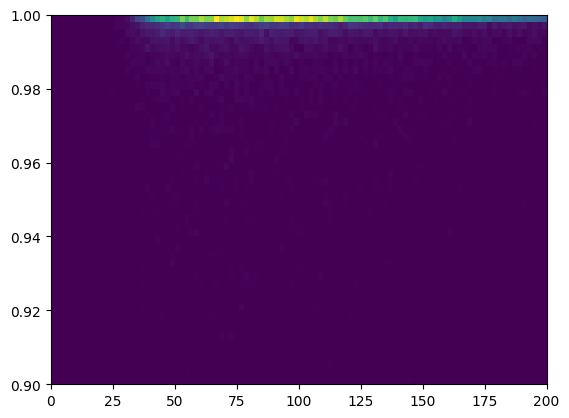

29047
[False False False ... False False False]
[52.59375 47.40625 77.75    65.875   78.625   55.15625 68.3125  63.
 69.3125  59.40625 58.      68.75    49.78125 64.5     59.40625 65.
 70.1875  72.8125  54.75    78.125   63.53125 70.6875  78.4375  72.75
 62.375   73.125   73.125   69.5625  61.40625 78.0625  58.59375 79.125
 76.9375  73.375   75.9375  72.      69.875   71.375   74.      69.25
 56.59375 58.96875 65.1875  38.53125 75.25    60.125   76.3125  78.
 67.375   78.6875  58.5     74.6875  70.8125  78.0625  68.1875  67.1875
 59.25    67.75    48.21875 73.25    72.3125  59.40625 71.4375  51.40625
 77.9375  70.9375  69.5     70.      74.5     76.5625  74.625   69.8125
 75.      62.25    79.9375  76.375   64.4375  49.0625  75.9375  67.125
 72.8125  64.4375  72.6875  79.75    75.9375  68.4375  73.1875  70.875
 73.6875  76.1875  78.9375  54.84375 76.125   74.9375  78.625   62.3125
 75.4375  67.8125  74.125   51.09375 76.0625  52.34375 77.875   70.25
 77.375   60.8125  71.75    69.6875 

In [63]:
index=np.array(range(0,len(col['JetGoodBTagOrder_pt']), 4))
print(index)

#histo 2d of the fisrt jet pt vs btag
import matplotlib.pyplot as plt
plt.hist2d(col['JetGoodBTagOrder_pt'][index],col['JetGoodBTagOrder_btagPNetB'][index],bins=(100,50),range=((0,200),(0.9,1)))
plt.show()

pt_lead=col['JetGoodPtOrder_pt'][index]
index_sub=np.array(range(1,len(col['JetGoodBTagOrder_pt']), 4))
pt_sublead=col['JetGoodPtOrder_pt'][index_sub]
print(len(pt_lead))

mask = (pt_lead<80) & (pt_sublead<60)
print(mask)
print((pt_lead[mask]))

print(len(pt_sublead))
print((pt_sublead[mask]))
print(len(pt_sublead[mask]))
print(len(pt_lead[(pt_lead<80)]))
print(len(pt_sublead[(pt_sublead<60)]))

mask_or = (pt_lead<80) | (pt_sublead<60)
print(mask_or)
print(len(pt_lead[mask_or]))
print(len(pt_sublead[mask_or]))


In [6]:

# n_parton=col["PartonMatched_N"]
# print((n_parton[n_parton<2]))
# print(len(col["JetGood_pt"][col["JetGood_pt"]>80]))

# i=range(0,len(col_matched["JetGood_pt"]),4)
# print(i)

# jet_match_eta=col["JetGoodBTagOrderMatched_eta"]
# print(len(jet_match_eta[abs(jet_match_eta)>2.5]))
# print(len(jet_match_eta[abs(jet_match_eta)<2.5]))
# print(len(jet_match_eta))
print("matched")
jet_match_btag=col["JetGoodBTagOrderMatched_btagPNetB"]
print(len(jet_match_btag[jet_match_btag<0.2605]))
print(len(jet_match_btag[jet_match_btag>0.2605]))
print(len(jet_match_btag))

print("\n all")
jet_btag=col["JetGood_btagPNetB"]
print(len(jet_btag[jet_btag<0.2605]))
print(len(jet_btag[jet_btag>0.2605]))
print(len(jet_btag))

matched
9541
76297
85838

 all
37704
79469
117173


In [37]:
pnet=col["JetGoodBTagOrderMatched_btagPNetB"]
mask_loose=pnet>0.2605
print(mask_loose)
mask_loose=ak.mask(mask_loose,mask_loose)
print(len(mask_loose))
n_matched = col["JetGoodBTagOrderMatched_N"]
print(ak.sum(n_matched))


unflat_mask_pnet= ak.unflatten(mask_loose,n_matched)
print((unflat_mask_pnet[-2:]))

pnet_unflat = ak.unflatten(pnet, n_matched)
print((pnet_unflat[-2:]))


# pnet_high=pnet[~ak.is_none(mask_loose)]
pnet_high=ak.mask(pnet, mask_loose)
print(pnet_high[-5:])

print(~ak.is_none(mask_loose)[-5:])

pnet_high_unflat = ak.unflatten(pnet_high, n_matched)
print((pnet_high_unflat[-2:]))

num_matched_high= ak.num(pnet_high_unflat[~ak.is_none(pnet_high_unflat, axis=1)])
print(num_matched_high[-10:]  )

# num_matched_high= ak.num(pnet_high_unflat)
# print(num_matched_high[-3:]  )
pnet_mask=pnet_unflat[num_matched_high==4]
print(len(pnet_mask))

num_jets=ak.sum(num_matched_high)
print(num_jets)

[ True  True  True ...  True  True False]
85838
85838
[[True, True], [True, True, True, None]]
[[0.999, 0.953], [0.956, 0.953, 0.802, 0.18]]
[0.953, 0.956, 0.953, 0.802, None]
[True, True, True, True, False]
[[0.999, 0.953], [0.956, 0.953, 0.802, None]]
[3, 3, 2, 3, 3, 2, 3, 3, 2, 3]
6213
76297


In [10]:
import numpy as np
import matplotlib.pyplot as plt


def plot_histos(bins, reco, pnet, pnet_neutrino, num):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(
        reco,
        bins,
        label=f"RecoHiggs{num}Mass",
        color="blue",
        histtype="step",
        linewidth=2,
        density=True,
    )
    ax.hist(
        pnet,
        bins,
        label=f"PNetRegRecoHiggs{num}Mass",
        color="red",
        histtype="step",
        linewidth=2,
        density=True,
    )
    ax.hist(
        pnet_neutrino,
        bins,
        label=f"PNetRegNeutrinoRecoHiggs{num}Mass",
        color="green",
        histtype="step",
        linewidth=2,
        density=True,
    )
    ax.legend(loc="upper right")
    ax.text(
        0.75,
        0.5,
        "mean reco: {:.2f}\nmean pnet: {:.2f}\nmean pnet neutrino: {:.2f}\nstd dev reco: {:.2f}\nstd dev pnet: {:.2f}\nstd dev pnet neutrino: {:.2f}".format(
            np.mean(reco),
            np.mean(pnet),
            np.mean(pnet_neutrino),
            np.std(reco),
            np.std(pnet),
            np.std(pnet_neutrino),
        ),
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )
    plt.show()

In [60]:
print(o["columns"])
print(len(col["events_GenHiggs1Mass"]))

{'GluGlutoHHto4B': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': {'hh4b_parton_matching': {'PartonMatched_N': column_accumulator(array([4, 4, 4, ..., 4, 4, 4])), 'PartonMatched_provenance': column_accumulator(array([2., 1., 2., ..., 2., 1., 2.])), 'PartonMatched_pdgId': column_accumulator(array([-5., -5.,  5., ..., -5., -5.,  5.])), 'PartonMatched_dRMatchedJet': column_accumulator(array([0.00926851, 0.03207359, 0.07502043, ..., 0.12184472, 0.00518799,
       0.19818784])), 'PartonMatched_genPartIdxMother': column_accumulator(array([14., 13., 14., ..., 21., 20., 21.])), 'PartonMatched_pt': column_accumulator(array([122.25 ,  54.375,  47.75 , ..., 164.5  , 195.   ,  70.5  ])), 'PartonMatched_eta': column_accumulator(array([ 0.84765625, -0.04260254,  0.96484375, ...,  0.44921875,
       -0.25878906,  0.48144531])), 'PartonMatched_phi': column_accumulator(array([ 0.453125  , -2.109375  , -1.4453125 , ..., -0.17773438,
        2.421875  , -1.4140625 ])), 'JetGoodBT

In [12]:
print(col['PartonMatched_provenance'][:20])
print(col['PartonMatched_genPartIdxMother'][:20])
print(col['PartonMatched_pdgId'][:20])


[2. 1. 2. 1. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 2. 1. 2. 1.]
[14. 13. 14. 13. 22. 23. 22. 23. 16. 15. 16. 15. 17. 18. 17. 18. 16. 15.
 16. 15.]
[-5. -5.  5.  5.  5. -5. -5.  5.  5.  5. -5. -5. -5.  5.  5. -5.  5.  5.
 -5. -5.]


In [13]:
print(len(col['PartonMatched_provenance'][col['PartonMatched_provenance']==1]))
print(len(col['PartonMatched_provenance'][col['PartonMatched_provenance']==2]))


10802
10802


In [143]:
import awkward as ak

dr1 = col["JetGoodBTagOrderMatched_dRMatchedJet"]
dr2 = col["PartonMatched_dRMatchedJet"]
# print(dr1[dr1>0.38])
# print(dr2[dr2>0.38])
i = 16
pnet = col["JetGoodBTagOrder_btagPNetB"]
# print((pnet[pnet<0.2605]))
print((pnet[pnet < 0.0]))
print(len(pnet))

n_pnet = col["JetGoodBTagOrder_N"]
print(ak.sum(n_pnet))

# given the number of jets in each event, we can find the number of jets with pnet<0.2605 in each event
mask_veto_pnet = pnet < 0.2605
mask_veto_pnet = ak.mask(mask_veto_pnet, mask_veto_pnet)
print(len(mask_veto_pnet))

unflattened_mask_veto_pnet = ak.unflatten(mask_veto_pnet, n_pnet)
print((unflattened_mask_veto_pnet[:3]))

mask_pnet = ak.where(
    ak.is_none(unflattened_mask_veto_pnet), False, unflattened_mask_veto_pnet
)
mask_pnet = ak.num(unflattened_mask_veto_pnet[~ak.is_none(unflattened_mask_veto_pnet, axis=1)])
print(len(mask_pnet[mask_pnet==0]))
print(len(mask_pnet[mask_pnet>0]))
print(len(mask_pnet[mask_pnet]))
# pnet_vetoed  = pnet[mask_pnet]
# print(len(pnet_vetoed))

[]
105560
105560
105560
[[None, None, True, True], [None, None, None, None], [None, None, None, True]]
6355
20035
26390


In [16]:
print(col['JetGoodBTagOrderMatched_btagPNetB'][:20])
print(col['JetGoodBTagOrderMatched_pt'][:20])
print(col['JetGoodBTagOrderMatched_eta'][:20])
print(col['JetGoodBTagOrderMatched_phi'][:20])


[0.99755859 0.9921875  0.91699219 0.4296875  0.9296875  0.87597656
 0.87060547 0.43652344 0.99951172 0.99902344 0.99316406 0.39257812
 0.99902344 0.99365234 0.99316406 0.98925781 0.99902344 0.99560547
 0.99560547 0.29931641]
[101.3125   61.65625  40.84375  68.3125   96.      124.8125  142.875
  52.40625 197.75    183.375   122.0625   56.71875 133.5      85.25
  52.625   117.125   126.9375   84.625    48.9375   90.5    ]
[ 0.8536377  -0.06684875  0.89318848  0.81604004  1.43310547  0.11114502
  1.89135742  1.71533203 -1.60571289 -0.03614044 -1.39794922  0.70153809
 -1.37524414 -0.19424438 -0.24761963 -0.34216309 -1.89697266 -2.01855469
 -0.67590332 -1.43969727]
[ 0.44604492 -2.13037109 -1.4675293   2.60644531  1.16455078 -2.88476562
  0.28289795 -2.59912109  2.90380859  0.32592773 -2.73535156  0.65698242
  0.24765015 -2.40234375  0.12213135  2.75292969  3.10839844  0.87854004
 -1.95507812 -0.14547729]


In [48]:
print(col["JetGoodBTagOrderMatched_pt"][:16])
print(col["JetGoodBTagOrder_pt"][:16])
print(col["JetGood_pt"][:16])
print(col["JetGoodPtOrder_pt"][:16])
print("\n\n")
print(col["JetGoodBTagOrderMatched_btagPNetB"][:16])
print(col["JetGoodBTagOrder_btagPNetB"][:16])
print(col["JetGood_btagPNetB"][:16])
print(col["JetGoodPtOrder_btagPNetB"][:16])

[101.3125   61.65625  40.84375  68.3125   96.      124.8125  142.875
  52.40625 197.75    183.375   122.0625   56.71875  78.       81.1875
  88.8125   75.6875 ]
[101.3125   61.65625  40.84375  68.3125   96.      124.8125  142.875
  52.40625 197.75    183.375   122.0625   56.71875  78.       81.1875
  88.8125   75.6875 ]
[101.3125   61.65625  40.84375  68.3125   96.      124.8125  142.875
  52.40625 197.75    183.375   122.0625   56.71875  41.03125  62.59375
  78.       81.1875 ]
[101.3125   68.3125   61.65625  40.84375 142.875   124.8125   96.
  52.40625 197.75    183.375   122.0625   56.71875  88.8125   81.1875
  78.       75.6875 ]



[0.99755859 0.9921875  0.91699219 0.4296875  0.9296875  0.87597656
 0.87060547 0.43652344 0.99951172 0.99902344 0.99316406 0.39257812
 0.99951172 0.99853516 0.52587891 0.13879395]
[0.9975586  0.9921875  0.9169922  0.4296875  0.9296875  0.87597656
 0.87060547 0.43652344 0.9995117  0.99902344 0.99316406 0.39257812
 0.9995117  0.99853516 0.5258789  0.13879

In [18]:
print(len(col["JetGood_pt"]))
print(len(col["JetGoodBTagOrder_pt"]))
print(len(col["JetGoodBTagOrderMatched_pt"]))


24897
21604
21604


In [19]:
print(o["variables"]["PNetRegRecoHiggs2Mass"]['GluGlutoHHto4B']['GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022'])
histos=[]
for v in ["PNetRegRecoHiggs1Mass","RecoHiggs1Mass"]:
    histos.append(o["variables"][v]['GluGlutoHHto4B']['GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022'])

Hist(
  StrCategory(['hh4b_parton_matching'], name='cat', label='Category'),
  StrCategory(['nominal'], name='variation', label='Variation'),
  Regular(30, 60, 200, name='events.PNetRegRecoHiggs2Mass', label='PNetRegRecoHiggs2Mass'),
  storage=Weight()) # Sum: WeightedSum(value=88.6449, variance=2.16143) (WeightedSum(value=89.3563, variance=2.17704) with flow)


[110.258255   115.96200562 110.9469223  ... 127.29364777 113.84644318
 114.52162933]
mean 113.87772558747149
std dev 21.165133214326556
[ 99.02098083 116.95057678 112.76870728 ... 120.00704956 113.18943024
 115.27112579]
mean 112.62114972647542
std dev 20.072337389602207
[105.87376404 119.42688751 121.12442017 ... 121.88666534 115.8832016
 127.91712189]
mean 118.83124695635772
std dev 20.358589495857146


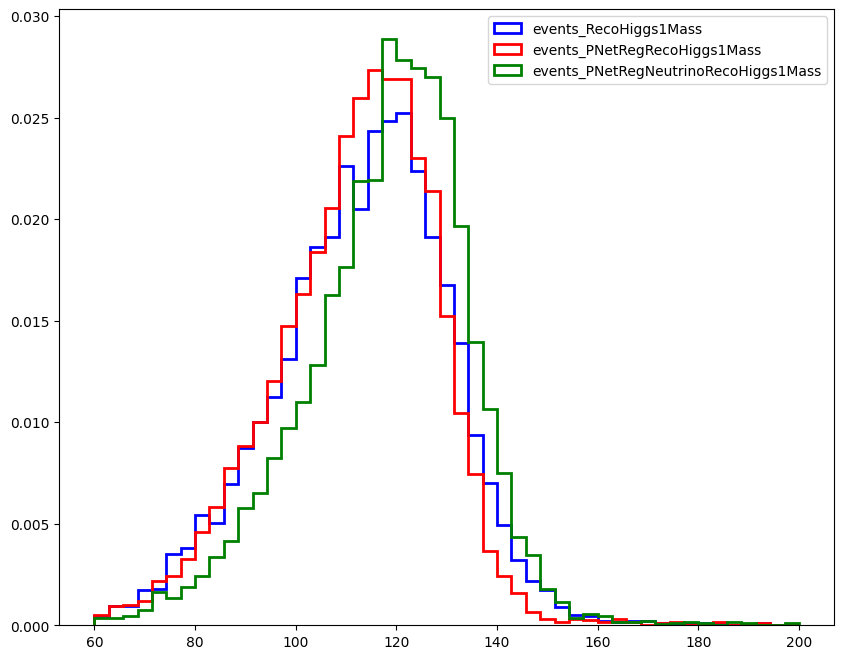

[106.65410614 151.04466248  87.90422821 ... 107.73703766 119.68573761
  85.74471283]
mean 116.30959485322843
std dev 25.775273781759687
[110.74269104 147.51882935  89.32715607 ... 104.70230865 120.52002716
  88.03388977]
mean 114.94330601339631
std dev 24.839836264225063
[132.01989746 150.8288269   91.40312195 ... 113.56224823 125.12509918
  89.40325165]
mean 121.36974588605607
std dev 25.513761466642325


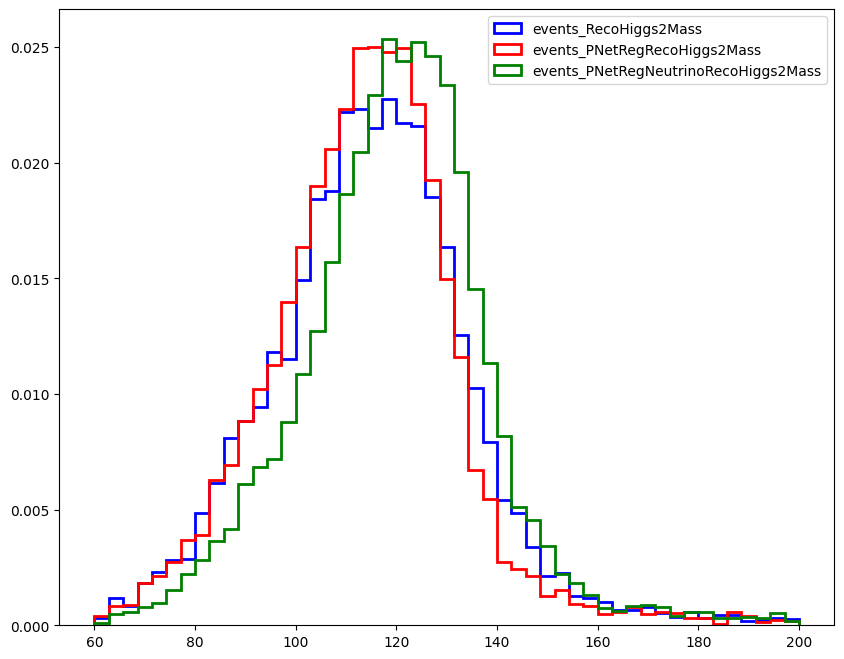

In [151]:
import matplotlib.pyplot as plt
import numpy as np
bins = np.linspace(60, 200, 50)
colors=["blue","red", "green"]
k=0

fig, ax = plt.subplots(figsize=(10,8))
for c in ["events_RecoHiggs1Mass", "events_PNetRegRecoHiggs1Mass", "events_PNetRegNeutrinoRecoHiggs1Mass"]:
    a=np.array(col[c])
    print(a)
    # do not fill with color
    ax.hist(a, bins, label=c, color=colors[k], histtype='step', linewidth=2, density=True)
    k+=1
    print("mean", np.mean(a))
    print("std dev", np.std(a))
ax.legend(loc='upper right')
plt.show()


k=0
fig, ax = plt.subplots(figsize=(10,8))
for c in ["events_RecoHiggs2Mass", "events_PNetRegRecoHiggs2Mass", "events_PNetRegNeutrinoRecoHiggs2Mass"]:
    a=np.array(col[c])
    print(a)
    # do not fill with color
    ax.hist(a, bins, label=c, color=colors[k], histtype='step', linewidth=2, density=True)
    k+=1
    print("mean", np.mean(a))
    print("std dev", np.std(a))
ax.legend(loc='upper right')
plt.show()

5401
5401
5401
5401
10802
10802


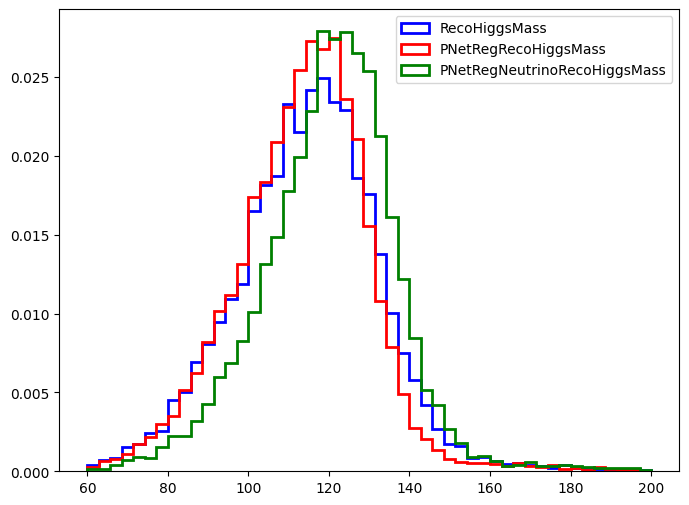

[110.258255   115.96173859 110.94664001 ... 105.53392792 363.15011597
 119.68573761]
mean reco 115.14854104808913
mean pnet 113.88582963913464
mean pnet nutrino 120.77804110258117
std dev reco 19.847753886405354
std dev pnet 18.617450356960227
std dev pnet neutrino 18.947379420983232


In [21]:
print(len(col["events_RecoHiggs1Mass"]))
print(len(col["events_RecoHiggs2Mass"]))
print(len(col["events_PNetRegRecoHiggs1Mass"]))
print(len(col["events_PNetRegRecoHiggs2Mass"]))
higgs_mass=np.concatenate((col["events_RecoHiggs1Mass"], col["events_RecoHiggs2Mass"]))
pnet_higgs_mass=np.concatenate((col["events_PNetRegRecoHiggs1Mass"], col["events_PNetRegRecoHiggs2Mass"]))
pnet_neutrino_higgs_mass=np.concatenate((col["events_PNetRegNeutrinoRecoHiggs1Mass"], col["events_PNetRegNeutrinoRecoHiggs2Mass"]))
print(len(higgs_mass))
print(len(pnet_higgs_mass))
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(higgs_mass, bins, label="RecoHiggsMass", color="blue", histtype='step', linewidth=2, density=True)
ax.hist(pnet_higgs_mass, bins, label="PNetRegRecoHiggsMass", color="red", histtype='step', linewidth=2, density=True)
ax.hist(pnet_neutrino_higgs_mass, bins, label="PNetRegNeutrinoRecoHiggsMass", color="green", histtype='step', linewidth=2, density=True)
ax.legend(loc='upper right')
plt.show()
print(higgs_mass)

#average mass
print("mean reco", np.mean(higgs_mass))
print("mean pnet",np.mean(pnet_higgs_mass))
print("mean pnet nutrino",np.mean(pnet_neutrino_higgs_mass))

#std dev
print("std dev reco",np.std(higgs_mass))
print("std dev pnet",np.std(pnet_higgs_mass))
print("std dev pnet neutrino",np.std(pnet_neutrino_higgs_mass))


In [153]:
print(col["events_GenHiggs1Pt"])
print(col["events_GenHiggs2Pt"])
print(col["events_RecoHiggs1Pt"])
print(col["events_RecoHiggs2Pt"])
print(col["events_PNetRegRecoHiggs1Pt"])
print(col["events_PNetRegRecoHiggs2Pt"])
print(col["events_PNetRegNeutrinoRecoHiggs1Pt"])
print(col["events_PNetRegNeutrinoRecoHiggs2Pt"])

for type_jet in ["Gen", "Reco", "PNetRegReco", "PNetRegNeutrinoReco"]:
    print(type_jet, len(col[f"events_{type_jet}Higgs1Pt"][col[f"events_{type_jet}Higgs1Pt"]>=col[f"events_{type_jet}Higgs2Pt"]]))
    print(type_jet, len(col[f"events_{type_jet}Higgs1Pt"][col[f"events_{type_jet}Higgs1Pt"]<=col[f"events_{type_jet}Higgs2Pt"]]))
    # print(type_jet, (col[f"events_{type_jet}Higgs2Pt"][col[f"events_{type_jet}Higgs1Pt"]<=col[f"events_{type_jet}Higgs2Pt"]]))


[118.61804199 228.04626465 332.8656311  ... 140.23262024 295.80871582
 256.99667358]
[116.05182648 128.65933228 278.2427063  ... 110.28886414 232.16917419
 199.10923767]
[ 93.13345337 216.96226501 304.31842041 ... 136.76217651 264.81442261
 234.29718018]
[ 95.66004181 175.71684265 237.7298584  ...  92.55835724 219.94198608
 155.2102356 ]
[ 84.24796295 217.93363953 305.63711548 ... 127.85522461 263.28271484
 240.19940186]
[ 95.59272766 174.49353027 238.45690918 ...  83.9417572  223.30274963
 154.62486267]
[ 91.72196198 222.79043579 334.56497192 ... 129.55847168 269.82589722
 257.94677734]
[118.54936218 178.40116882 243.42630005 ...  93.4434433  230.9981842
 157.28547668]
Gen 9557
Gen 32
Reco 7091
Reco 2498
PNetRegReco 7179
PNetRegReco 2410
PNetRegNeutrinoReco 7260
PNetRegNeutrinoReco 2329


[ 93.13345337 216.96226501 304.31842041 ... 236.12132263 267.82919312
 264.81442261]
[ 95.66004181 175.71684265 237.7298584  ... 180.36341858 439.78485107
 219.94198608]
[110.258255   115.96173859 110.94664001 ... 117.92264557 117.1255188
 113.84644318]
[106.65406799 151.04470825  87.90422821 ... 105.53392792 363.15011597
 119.68573761]
[106.65406799 115.96173859 110.94664001 ... 117.92264557 363.15011597
 113.84644318]
[110.258255   151.04470825  87.90422821 ... 105.53392792 117.1255188
 119.68573761]
[ 99.02098083 116.95030975 112.76870728 ... 113.26613617 121.92447662
 113.18943024]
[110.74265289 147.51882935  89.32715607 ... 105.0437088  353.13259888
 120.52002716]
[105.87377167 119.42662811 121.12442017 ... 123.65827942 124.49943542
 115.8832016 ]
[132.01986694 150.82888794  91.40312195 ... 109.15518188 359.95849609
 125.12509918]


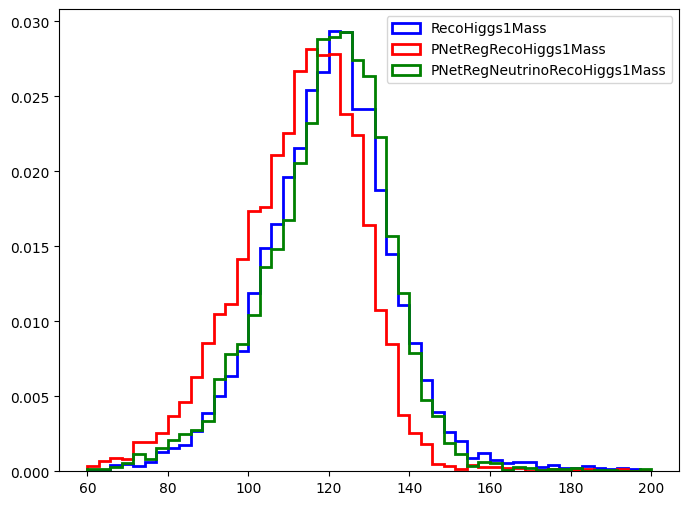

mean reco 120.49849663776637
mean pnet 112.89809430155395
mean pnet neutrino 119.61061571103912
std dev reco 17.492175530303193
std dev pnet 15.996745227095577
std dev pnet neutrino 16.026250843713882


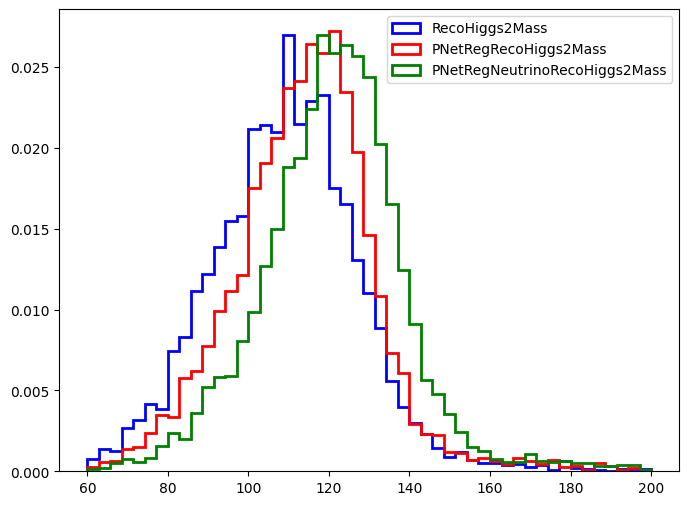

mean reco 109.79858545841188
mean pnet 114.87356497671533
mean pnet neutrino 121.94546649412322
std dev reco 20.60695062993703
std dev pnet 20.865565305855977
std dev pnet neutrino 21.41120953262855


[89.45117188]
[106.38858795]
[122.77397156]


In [23]:
# oirder higgs 1 and 2 based on the reco higgs pt
print(col["events_RecoHiggs1Pt"])
print(col["events_RecoHiggs2Pt"])

higgs1_mass_order = np.where(
    col["events_RecoHiggs1Pt"] >= col["events_RecoHiggs2Pt"],
    col["events_RecoHiggs1Mass"],
    col["events_RecoHiggs2Mass"],
)
higgs2_mass_order = np.where(
    col["events_RecoHiggs1Pt"] >= col["events_RecoHiggs2Pt"],
    col["events_RecoHiggs2Mass"],
    col["events_RecoHiggs1Mass"],
)
pnet_higgs1_mass_order = np.where(
    col["events_RecoHiggs1Pt"] >= col["events_RecoHiggs1Pt"],
    col["events_PNetRegRecoHiggs1Mass"],
    col["events_PNetRegRecoHiggs2Mass"],
)
pnet_higgs2_mass_order = np.where(
    col["events_RecoHiggs1Pt"] >= col["events_RecoHiggs1Pt"],
    col["events_PNetRegRecoHiggs2Mass"],
    col["events_PNetRegRecoHiggs1Mass"],
)
pnet_neutrino_higgs1_mass_order = np.where(
    col["events_RecoHiggs1Pt"] >= col["events_RecoHiggs1Pt"],
    col["events_PNetRegNeutrinoRecoHiggs1Mass"],
    col["events_PNetRegNeutrinoRecoHiggs2Mass"],
)
pnet_neutrino_higgs2_mass_order = np.where(
    col["events_RecoHiggs1Pt"] >= col["events_RecoHiggs1Pt"],
    col["events_PNetRegNeutrinoRecoHiggs2Mass"],
    col["events_PNetRegNeutrinoRecoHiggs1Mass"],
)


higg1_mass = np.array(col["events_RecoHiggs1Mass"])
higg2_mass = np.array(col["events_RecoHiggs2Mass"])
print(higg1_mass)
print(higg2_mass)
print(higgs1_mass_order)
print(higgs2_mass_order)
print(pnet_higgs1_mass_order)
print(pnet_higgs2_mass_order)
print(pnet_neutrino_higgs1_mass_order)
print(pnet_neutrino_higgs2_mass_order)

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(
    higgs1_mass_order,
    bins,
    label="RecoHiggs1Mass",
    color="blue",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.hist(
    pnet_higgs1_mass_order,
    bins,
    label="PNetRegRecoHiggs1Mass",
    color="red",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.hist(
    pnet_neutrino_higgs1_mass_order,
    bins,
    label="PNetRegNeutrinoRecoHiggs1Mass",
    color="green",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.legend(loc="upper right")
plt.show()



print("mean reco", np.mean(higgs1_mass_order))
print("mean pnet", np.mean(pnet_higgs1_mass_order))
print("mean pnet neutrino", np.mean(pnet_neutrino_higgs1_mass_order))
print("std dev reco", np.std(higgs1_mass_order))
print("std dev pnet", np.std(pnet_higgs1_mass_order))
print("std dev pnet neutrino", np.std(pnet_neutrino_higgs1_mass_order))

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(
    higgs2_mass_order,
    bins,
    label="RecoHiggs2Mass",
    color="blue",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.hist(
    pnet_higgs2_mass_order,
    bins,
    label="PNetRegRecoHiggs2Mass",
    color="red",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.hist(
    pnet_neutrino_higgs2_mass_order,
    bins,
    label="PNetRegNeutrinoRecoHiggs2Mass",
    color="green",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.legend(loc="upper right")
plt.show()

print("mean reco", np.mean(higgs2_mass_order))
print("mean pnet", np.mean(pnet_higgs2_mass_order))
print("mean pnet neutrino", np.mean(pnet_neutrino_higgs2_mass_order))
print("std dev reco", np.std(higgs2_mass_order))
print("std dev pnet", np.std(pnet_higgs2_mass_order))
print("std dev pnet neutrino", np.std(pnet_neutrino_higgs2_mass_order))


mask_mass_order = pnet_neutrino_higgs1_mass_order > pnet_higgs1_mass_order
# & (
#     pnet_neutrino_higgs1_mass_order > higg1_mass
# )
print("\n")
print(pnet_neutrino_higgs1_mass_order[~mask_mass_order])
print(pnet_higgs1_mass_order[~mask_mass_order])
print(higg1_mass[~mask_mass_order])

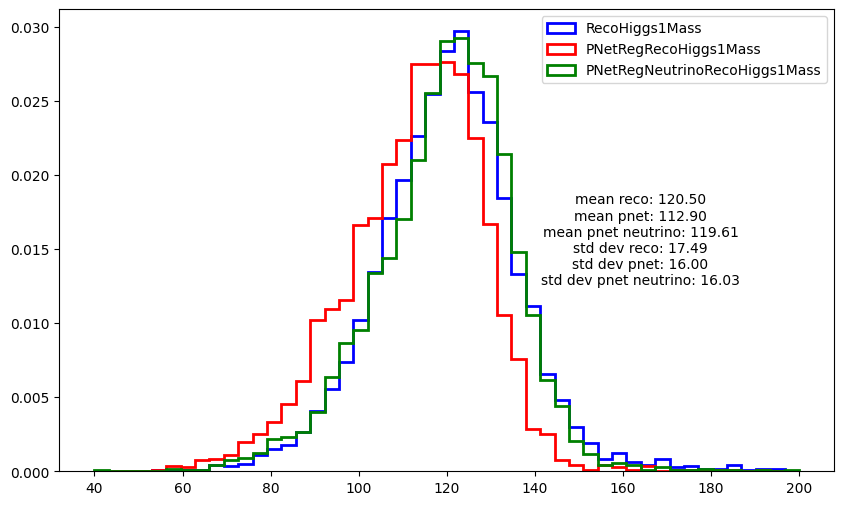

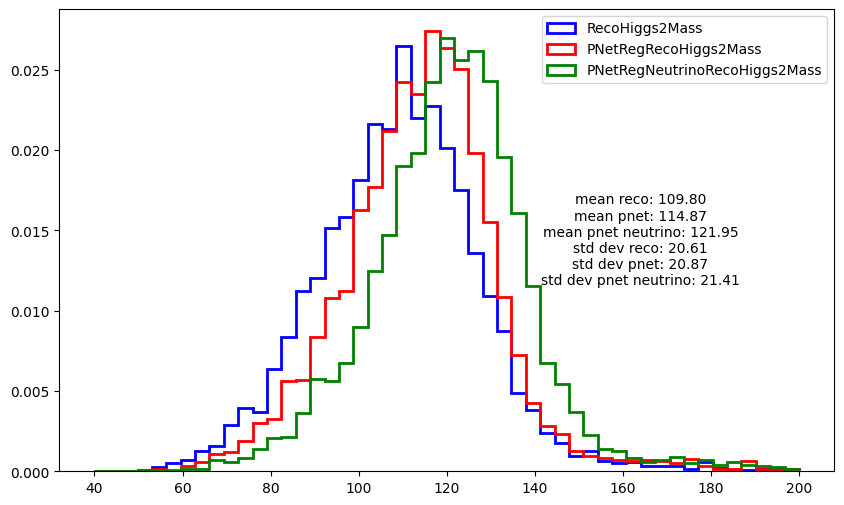

In [24]:
bins=np.linspace(40, 200, 50)
plot_histos(bins, higgs1_mass_order, pnet_higgs1_mass_order, pnet_neutrino_higgs1_mass_order, 1)
plot_histos(bins, higgs2_mass_order, pnet_higgs2_mass_order, pnet_neutrino_higgs2_mass_order, 2)

[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[0.88543647 0.93162528 0.88945186 ... 0.94519043 0.94000259 0.91327296]
[0.85632842 1.21244976 0.70580607 ... 0.84713319 2.94433503 0.96090985]
[0.79519477 0.93956737 0.90405925 ... 0.90786691 0.97851711 0.90800242]
[0.88915578 1.1841472  0.71723113 ... 0.84319814 2.86311538 0.96760803]
[0.85022658 0.95946187 0.97104645 ... 0.99116351 0.9991827  0.92961178]
[1.05999112 1.21071735 0.73389961 ... 0.87620142 2.91845813 1.00458035]


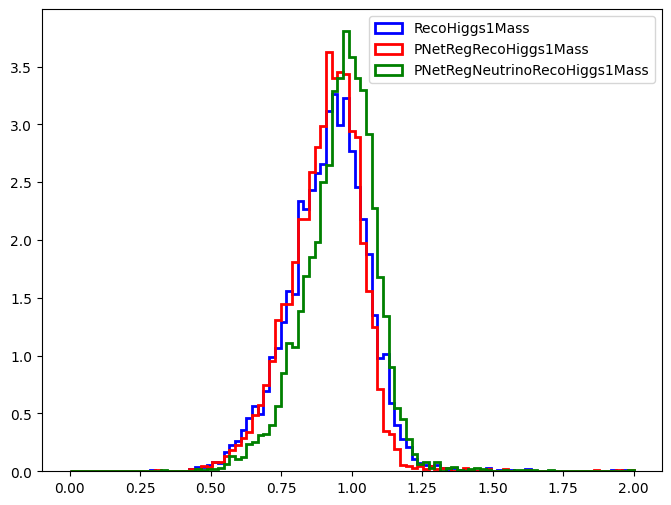

mean reco 0.9158117851732037
mean pnet 0.9064615235182161
mean pnet nutrino 0.9603549660556614
std dev reco 0.1405358030020788
std dev pnet 0.12855375061927768
std dev pnet neutrino 0.12879195258695564


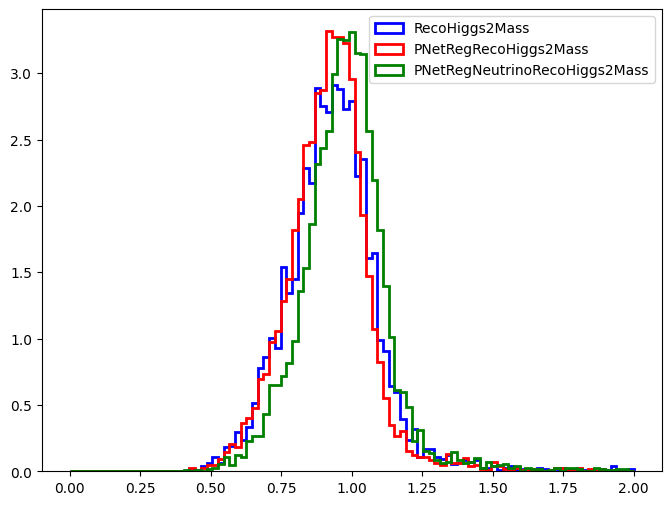

mean reco 0.9332144057828652
mean pnet 0.9222852000087962
mean pnet nutrino 0.9790625538093058
std dev reco 0.1761085567050728
std dev pnet 0.16780363058218514
std dev pnet neutrino 0.17220010308847972


In [25]:
bins_ratio = np.linspace(0, 2, 100)
mask_pt1=np.array(col["events_RecoHiggs1Pt"]>=100) & np.array(col["events_RecoHiggs1Pt"]<=200)
mask_pt2=np.array(col["events_RecoHiggs2Pt"]>=100) & np.array(col["events_RecoHiggs2Pt"]<=200)

mask_pt1=np.ones_like(col["events_RecoHiggs1Pt"]).astype(bool)
mask_pt2=np.ones_like(col["events_RecoHiggs2Pt"]).astype(bool)
print(mask_pt1)
print(mask_pt2)
gen_higgs_mass1 = np.array(col["events_GenHiggs1Mass"][mask_pt1])
gen_higgs_mass2 = np.array(col["events_GenHiggs2Mass"][mask_pt2])
reco_ratio1 = np.array(col["events_RecoHiggs1Mass"][mask_pt1]) / gen_higgs_mass1
reco_ratio2 = np.array(col["events_RecoHiggs2Mass"][mask_pt2]) / gen_higgs_mass2
pnet_ratio1 = np.array(col["events_PNetRegRecoHiggs1Mass"][mask_pt1]) / gen_higgs_mass1
pnet_ratio2 = np.array(col["events_PNetRegRecoHiggs2Mass"][mask_pt2]) / gen_higgs_mass2
pnet_neutrino_ratio1 = (
    np.array(col["events_PNetRegNeutrinoRecoHiggs1Mass"][mask_pt1]) / gen_higgs_mass1
)
pnet_neutrino_ratio2 = (
    np.array(col["events_PNetRegNeutrinoRecoHiggs2Mass"][mask_pt2]) / gen_higgs_mass2
)

print(reco_ratio1)
print(reco_ratio2)
print(pnet_ratio1)
print(pnet_ratio2)
print(pnet_neutrino_ratio1)
print(pnet_neutrino_ratio2)

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(
    reco_ratio1,
    bins_ratio,
    label="RecoHiggs1Mass",
    color="blue",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.hist(
    pnet_ratio1,
    bins_ratio,
    label="PNetRegRecoHiggs1Mass",
    color="red",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.hist(
    pnet_neutrino_ratio1,
    bins_ratio,
    label="PNetRegNeutrinoRecoHiggs1Mass",
    color="green",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.legend(loc="upper right")
plt.show()
print("mean reco", np.mean(reco_ratio1))
print("mean pnet", np.mean(pnet_ratio1))
print("mean pnet nutrino", np.mean(pnet_neutrino_ratio1))
print("std dev reco", np.std(reco_ratio1))
print("std dev pnet", np.std(pnet_ratio1))
print("std dev pnet neutrino", np.std(pnet_neutrino_ratio1))


fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(
    reco_ratio2,
    bins_ratio,
    label="RecoHiggs2Mass",
    color="blue",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.hist(
    pnet_ratio2,
    bins_ratio,
    label="PNetRegRecoHiggs2Mass",
    color="red",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.hist(
    pnet_neutrino_ratio2,
    bins_ratio,
    label="PNetRegNeutrinoRecoHiggs2Mass",
    color="green",
    histtype="step",
    linewidth=2,
    density=True,
)
ax.legend(loc="upper right")
plt.show()
print("mean reco", np.mean(reco_ratio2))
print("mean pnet", np.mean(pnet_ratio2))
print("mean pnet nutrino", np.mean(pnet_neutrino_ratio2))

print("std dev reco", np.std(reco_ratio2))
print("std dev pnet", np.std(pnet_ratio2))
print("std dev pnet neutrino", np.std(pnet_neutrino_ratio2))